In [13]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input,Dense, Dropout, Flatten, Activation, Reshape

In [14]:
ENCODING_DIM = 64

In [15]:
mnist = tf.keras.datasets.mnist # 28x28 image of digits

(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [16]:
from noisify import noisfy

In [17]:
n_train = noisfy(x_train,28,28,0.1)
n_test = noisfy(x_test,28,28,0.1)

In [18]:
encoder = Sequential([
    Flatten(input_shape=(28,28)),
    Dropout(0.5),
    Dense(2*ENCODING_DIM),
    Dropout(0.5),
    Dense(512),
    Dropout(0.5),
    Dense(ENCODING_DIM)
])

In [19]:
decoder = Sequential([
    Dense(ENCODING_DIM),
    Dropout(0.5),
    Dense(2*ENCODING_DIM),
    Dropout(0.5),
    Dense(512),
    Dropout(0.5),
    Dense(784),
    Activation('sigmoid'),
    Reshape((28,28))
])

In [20]:
img = Input(shape = (28, 28))

In [21]:
latent_vector = encoder(img)
output = decoder(latent_vector)

In [22]:
model = Model(inputs = img, outputs = output)
model.compile("adam", loss = "binary_crossentropy")

In [23]:
EPOCHS = 60

In [24]:
loss_trend = []
for i in range(EPOCHS):
    print("Epoch {}".format(i+1))
    model.fit(n_train, x_train,epochs=1,batch_size=256)
    print("Validating...")
    loss_trend.append(model.evaluate(n_test,x_test))

Epoch 1
235/235 [==============================] - 7s 24ms/step - loss: 0.2024
Validating...
313/313 [==============================] - 1s 3ms/step - loss: 0.1651
Epoch 2
235/235 [==============================] - 6s 24ms/step - loss: 0.1634
Validating...
313/313 [==============================] - 1s 3ms/step - loss: 0.1511
Epoch 3
235/235 [==============================] - 5s 22ms/step - loss: 0.1556
Validating...
313/313 [==============================] - 1s 3ms/step - loss: 0.1459
Epoch 4
235/235 [==============================] - 5s 22ms/step - loss: 0.1526
Validating...
313/313 [==============================] - 1s 3ms/step - loss: 0.1447
Epoch 5
235/235 [==============================] - 6s 24ms/step - loss: 0.1515
Validating...
313/313 [==============================] - 1s 3ms/step - loss: 0.1447
Epoch 6
235/235 [==============================] - 6s 27ms/step - loss: 0.1509
Validating...
313/313 [==============================] - 1s 3ms/step - loss: 0.1444
Epoch 7
235/235 [=====

In [25]:
import matplotlib.pyplot as plt

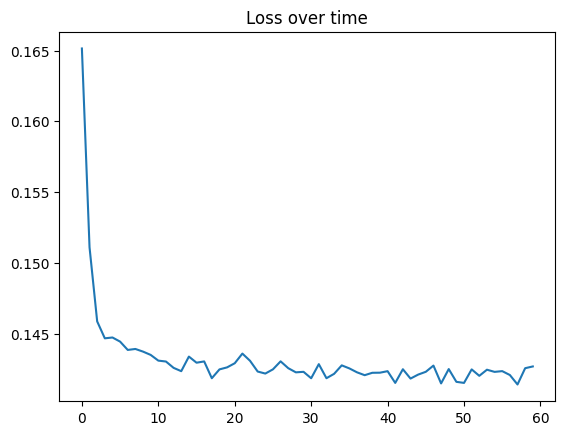

<Figure size 640x480 with 0 Axes>

In [26]:
plt.plot(loss_trend)
plt.title('Loss over time')
plt.show()
plt.savefig('img/loss.png')

In [27]:
decoded = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


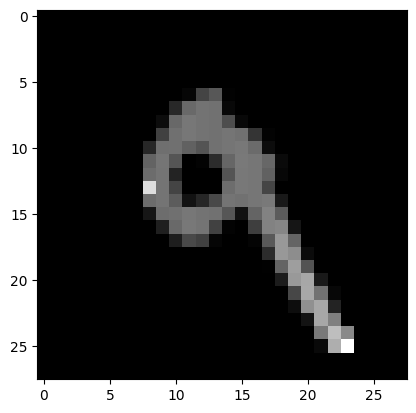

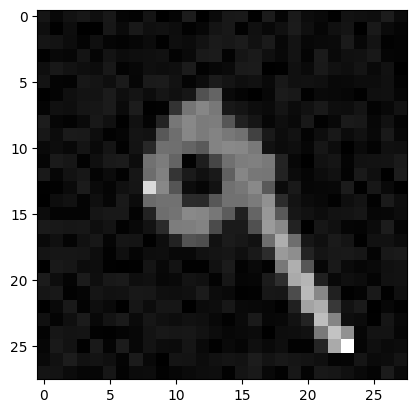

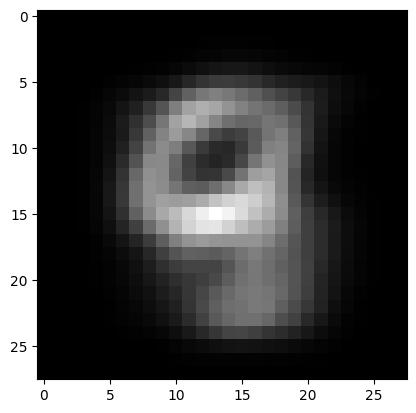

In [30]:
plt.imshow(x_test[7],cmap='gray')
plt.show()
plt.imshow(n_test[7],cmap='gray')
plt.show()
plt.imshow(decoded[7],cmap='gray')
plt.show()

In [29]:
import pickle

with open('pickle_objects/test_data.pickle','wb') as fs:
    pickle.dump(x_test,fs)

with open('pickle_objects/noisy_test_data.pickle','wb') as fs:
    pickle.dump(n_test,fs)

with open('pickle_objects/decoded.pickle','wb') as fs:
    pickle.dump(decoded,fs)

In [31]:
model.save('denoiser1.h5')